In [64]:
import tensorflow as tf

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [66]:
from tensorflow.keras.datasets import mnist

In [67]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [68]:
X_train.shape

(60000, 28, 28)

# Here the 60000 is the data set/images are present and the 28 28 are the input shape of the each image

In [69]:
X_test.shape

(10000, 28, 28)

In [70]:
y_train.shape

(60000,)

In [71]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

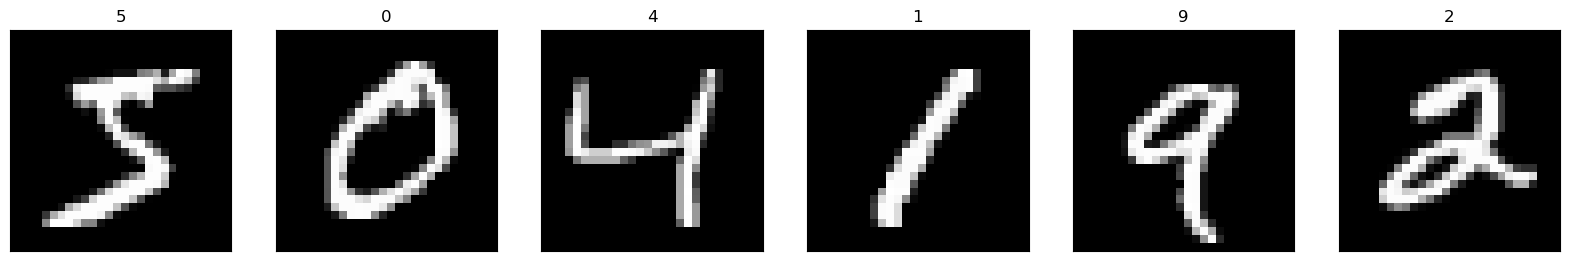

In [73]:
# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

# Reshape the Train and Test data set

In [74]:
# Reshape the Train and Test data set
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
# -1 is for all the elements present in the data set 28*28 will be pixels, 1 channel which is boack nd white

# Now normalize the data set

In [75]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [76]:
X_train=X_train/255
X_test=X_test/255

In [77]:
X_train.shape

(60000, 28, 28, 1)

# Convert the o/p classes into one hot encoding

In [78]:
import glob

In [79]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### As per above we can say that the 10 o/p classes are their

# Feature engineering

In [80]:
from tensorflow.keras.utils import to_categorical

In [81]:
num_class=10
y_train=to_categorical(y_train,num_classes=num_class)
y_test=to_categorical(y_test,num_classes=num_class)

In [82]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Model Building

In [49]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
"""
(3x3x32 + 1) x 32 = 320
(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1)

(3×3×32+1)×64=(288+1)×64=18,496
(Conv2D(64,kernel_size=(3,3),activation='relu')

(3×3×64+1)×128=(576+1)×128=73,856
Conv2D(128,kernel_size=(3,3),activation='relu')
"""

"\n(3x3x32 + 1) x 32 = 320\n(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1)\n\n(3×3×32+1)×64=(288+1)×64=18,496\n(Conv2D(64,kernel_size=(3,3),activation='relu')\n\n(3×3×64+1)×128=(576+1)×128=73,856\nConv2D(128,kernel_size=(3,3),activation='relu')\n"

# Compile the model

In [53]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [56]:
checkpoint=ModelCheckpoint(filepath='best_model.keras',verbose=1,monitor='val_accuracy',save_best_only=True,mode='max')

In [58]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=checkpoint,verbose=1)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9542 - loss: 0.1518
Epoch 1: val_accuracy improved from -inf to 0.97590, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 70ms/step - accuracy: 0.9542 - loss: 0.1518 - val_accuracy: 0.9759 - val_loss: 0.0795
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9807 - loss: 0.0642
Epoch 2: val_accuracy improved from 0.97590 to 0.97880, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 73ms/step - accuracy: 0.9807 - loss: 0.0642 - val_accuracy: 0.9788 - val_loss: 0.0733
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9862 - loss: 0.0444
Epoch 3: val_accuracy improved from 0.97880 to 0.98730, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 73ms/step - accuracy: 0.9862 - loss: 0.0444 - val_accuracy: 0.9873 - val_loss: 0.0428
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9896 - loss: 0.0331
Epoch 4: val_a

Epoch 25/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9994 - loss: 0.0023
Epoch 25: val_accuracy did not improve from 0.98890
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 74ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9864 - val_loss: 0.0756
Epoch 26/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9978 - loss: 0.0072
Epoch 26: val_accuracy did not improve from 0.98890
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 70ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9875 - val_loss: 0.0744
Epoch 27/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9980 - loss: 0.0070
Epoch 27: val_accuracy improved from 0.98890 to 0.98910, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 80ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9891 - val_loss: 0.0711
Epoch 28/50
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9992 - loss: 0.0024
Epoch 28: val_accuracy did not improve from 0.98910
1875/1875 ━━━━━━━━━━━━━━━━━━

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 85ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9873 - val_loss: 0.1366
Epoch 50/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9976 - loss: 0.0087
Epoch 50: val_accuracy did not improve from 0.98940
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 176s 71ms/step - accuracy: 0.9976 - loss: 0.0087 - val_accuracy: 0.9893 - val_loss: 0.1248


In [60]:
from tensorflow.keras.models import load_model

In [61]:
best_model=load_model('best_model.keras')

In [62]:
best_model

<Sequential name=sequential, built=True>

In [63]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 304,736 (1.16 MB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,158 (793.59 KB)

In [83]:
test_pred=best_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step


In [86]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [87]:
mean_squared_error(test_pred,y_test)

0.0018306375870736351

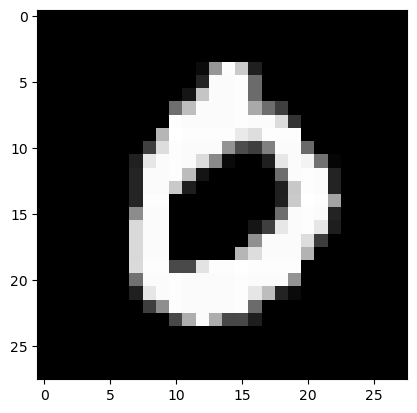

In [176]:
plt.imshow(X_test[3],cmap='gray')
plt.show()

# Test the model

In [177]:
test_model_image=X_test[3]

In [178]:
test_model_image=test_model_image.reshape(-1,28,28,1)

In [179]:
# test_model_image=test_model_image/255

In [180]:
model_test_pred=best_model.predict(test_model_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [181]:
import numpy as np

In [182]:
aa=np.argmax(model_test_pred,axis=1)
if aa==0:
    print('its 0')
elif aa==1:
    print('its 1')
elif aa==2:
    print('its 2')
elif aa==3:
    print('its 3')
elif aa==4:
    print('its 4')
elif aa==5:
    print('its 5')
elif aa==6:
    print('its 6')
elif aa==7:
    print('its 7')
elif aa==8:
    print('its 8')
else:
    print('its 9')
          

its 0
